In [1]:
import uncertainties as unc
import matplotlib.pyplot as plt
import pandas as pd

from unc_tools import UncRegression, Hyper, FunctionBase1D



In [2]:
df = pd.read_csv("velocities.csv")

df['r0'] = [unc.ufloat_fromstr(x) for x in df.r0]

df

,S0,r0
0,0.0030,(1.51+/-0.14)e-05
1,0.0045,(1.61+/-0.07)e-05
2,0.0075,(1.99+/-0.11)e-05
3,0.0150,(2.14+/-0.13)e-05
4,0.0225,(2.20+/-0.15)e-05


In [3]:
UncRegression.latex_style(True)

<Axes: >

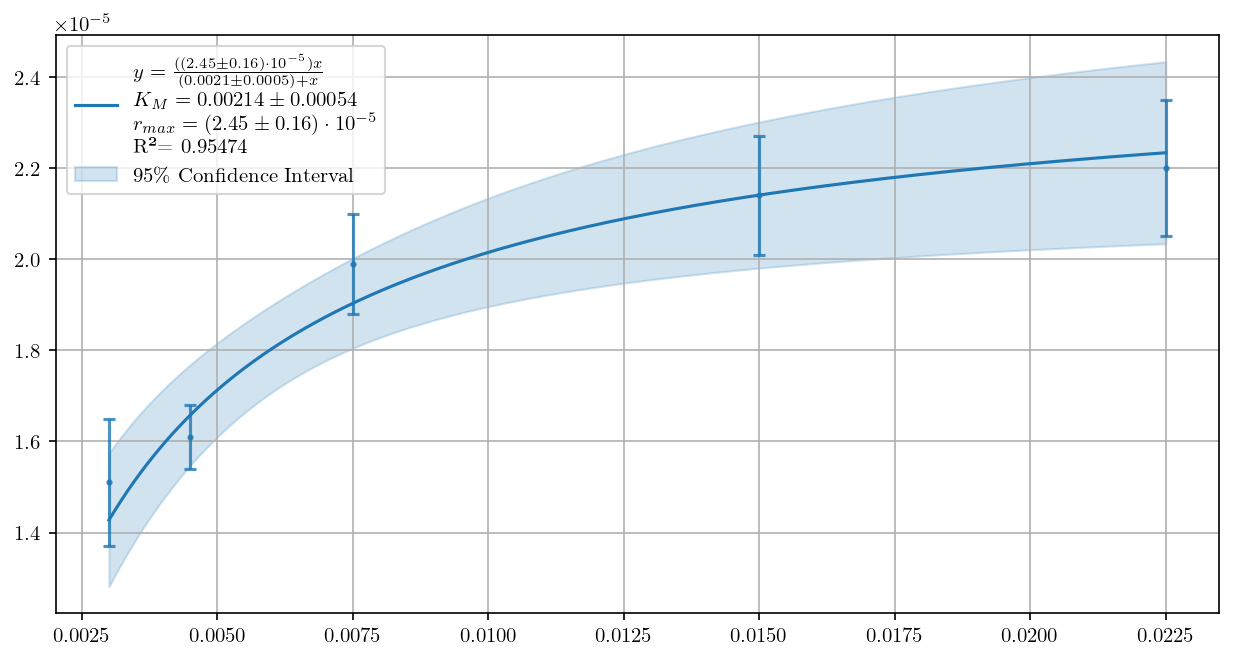

In [9]:
reg = UncRegression(df.S0, df.r0, func = FunctionBase1D("r_max * x / (K_M + x)"))

reg.plot(show_band=True, show_coefficients=True)


In [5]:
K_m1 = reg.coefs[1]

K_m1

2.4460934696894373e-05+/-1.582140958825421e-06

In [6]:
r_inf = reg.predict(1)

r_half = r_inf / 2

K_m2 = reg.find_x(r_half)

K_m1, K_m2

(2.4460934696894373e-05+/-1.582140958825421e-06,
 -0.004269806036780799+/-0.001138838998427156)